# Single load and generator with `PyPSA`(pipes-ah)

This is an introduction to the usage of the `PyPSA` **power flow** for a 2-bus system.
This example is adapted from the [`PyPSA` example for PF](https://github.com/PyPSA/PyPSA/blob/master/examples/notebooks/minimal_example_pf.ipynb). The installation of `PyPSA` is included at the bottom of this script. 

In [1]:
import pypsa

import warnings
warnings.filterwarnings('ignore')

Create an empty network

In [2]:
n = pypsa.Network()

Add two buses

In [3]:
n.add("Bus", "Bus Gen", v_nom=.230)  # PyPSA works in kV
n.add("Bus", "Bus Load", v_nom=.230) # v_mag_pu_min=0.95, v_mag_pu_max=1.05

In [4]:
n.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
Bus Gen,0.23,,0.0,0.0,AC,,1.0,0.0,inf,PQ,
Bus Load,0.23,,0.0,0.0,AC,,1.0,0.0,inf,PQ,


Add a line between the generator and the load

In [5]:
n.add("Line", name="Line", bus0="Bus Gen", bus1="Bus Load", x=0.1, r=0.01)

In [6]:
n.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
Line,Bus Gen,Bus Load,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


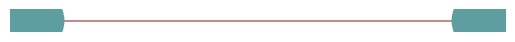

In [7]:
n.plot();

Add a generator with no preset power. The power will be adjusted to match the load.

In [8]:
n.add("Generator", "Generator", bus="Bus Gen", control='PQ') # This generator can adapt to the load

In [9]:
n.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Generator,Bus Gen,PQ,,0.0,False,0.0,inf,0.0,1.0,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


Add a load with **150** kW and **5** kVar

In [10]:
n.add("Load", "Load", bus="Bus Load", p_set=0.15, q_set=0.05) # power in PyPSA is given in MW, thus 0.15 MW = 150 kW

In [11]:
n.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
Load,Bus Load,,,0.15,0.05,-1.0


## Power flow estimation

In [12]:
n.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039347 seconds


{'n_iter': SubNetwork  0
 snapshot     
 now         4,
 'error': SubNetwork             0
 snapshot                
 now         3.942300e-07,
 'converged': SubNetwork     0
 snapshot        
 now         True}

What is the generator's active and reactive power?

In [13]:
n.generators_t.p

Generator,Generator
snapshot,
now,0.157809


In [14]:
n.generators_t.q

Generator,Generator
snapshot,
now,0.128093


The active power over the line (the same on the generator side and the same on the load side):

On the generator side:

In [15]:
n.lines_t.p0

,Line
snapshot,
now,0.157809


On the load side:

In [16]:
n.lines_t.p1

,Line
snapshot,
now,-0.15


The power consumed at the load:

In [17]:
n.loads_t.p

Load,Load
snapshot,
now,0.15


What is the voltage angle between the generator and the load? The generator is selected as the slack, thus its angle is 0.

In [18]:
n.buses_t.v_ang * 180 / 3.14159265359

Bus,Bus Gen,Bus Load
snapshot,,
now,0.0,-20.631335


The active power consumed at the load? 

In [19]:
n.buses_t.v_mag_pu

Bus,Bus Gen,Bus Load
snapshot,,
now,1.0,0.777916


### Installation and others

To use `PyPSA` it is advised to have `anaconda`/`miniconda` installed. Then either:
```
pip install pypsa
```
or
```
conda install -c conda-forge pypsa
```

This script was adapted from [`PyPSA`'s example for PF](https://github.com/PyPSA/PyPSA/blob/master/examples/notebooks/minimal_example_pf.ipynb) for the *FYS377 Digital Power Systems*, by *Heidi S. Nygård*, NMBU. Adapted by Leonardo Rydin Gorjão. 2023.